In [604]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import  xgboost as xgb
from sklearn.impute import SimpleImputer

In [605]:

data=pd.read_csv('data.csv')
data.sample(10)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [606]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   6691 non-null   object 
 9   OnlineSecurity    6691 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [607]:
numeric_col = data.select_dtypes(include=['int64', 'float64']).columns
num_imp = SimpleImputer(strategy='median')
data[numeric_col] = num_imp.fit_transform(data[numeric_col])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [608]:
object_col = data.select_dtypes(include=['object']).columns
cat_imp = SimpleImputer(strategy='most_frequent')
data[object_col] = cat_imp.fit_transform(data[object_col])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [609]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [610]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.0,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.0,72.00
MonthlyCharges,7043.0,65.042297,29.366794,18.25,40.300,70.300,89.3,118.75
TotalCharges,7043.0,2239.232944,2216.793789,18.80,442.725,1396.125,3606.8,8684.80


In [611]:
df1=data.copy()
for col in object_col:
    df1[col] = df1[col].astype('category')

label_encoder = LabelEncoder()
for col in object_col:
        df1[col] = label_encoder.fit_transform(df1[col])

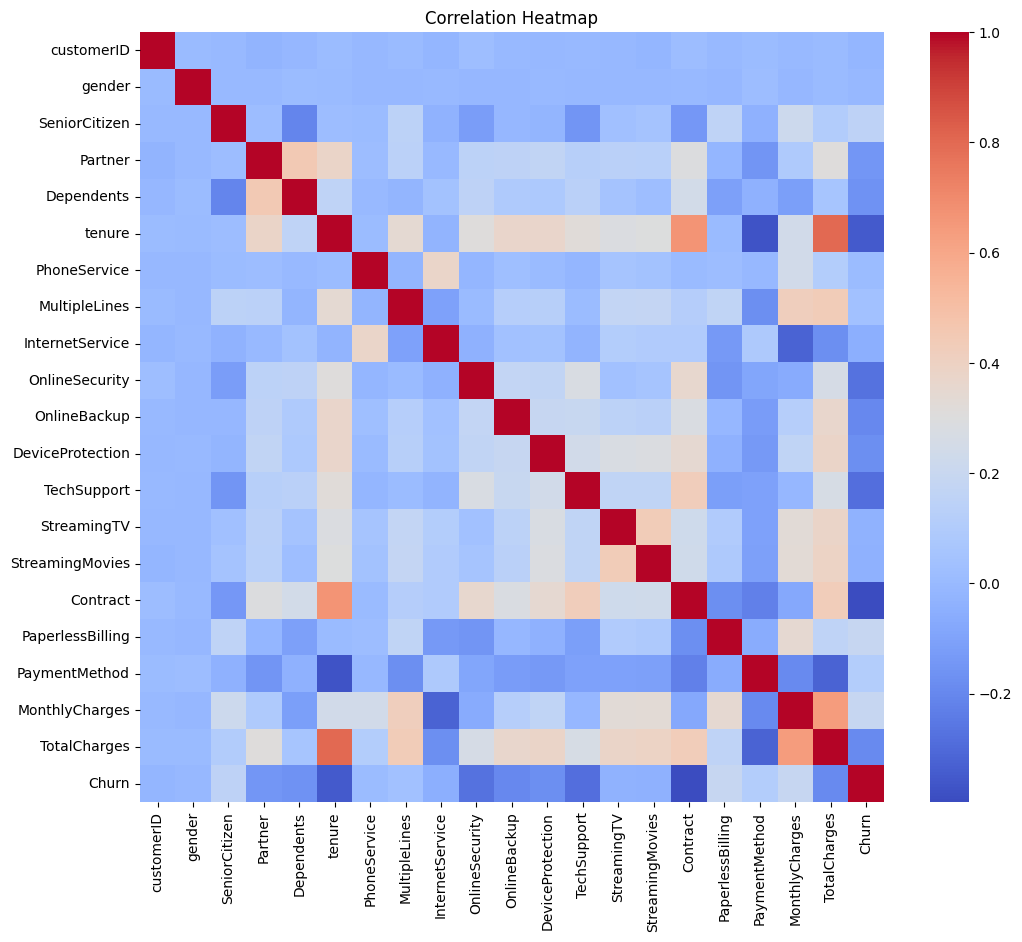

In [612]:
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


 Processing column: SeniorCitizen 
Number of outliers BEFORE removal: 1142
Number of outliers AFTER removal: 0


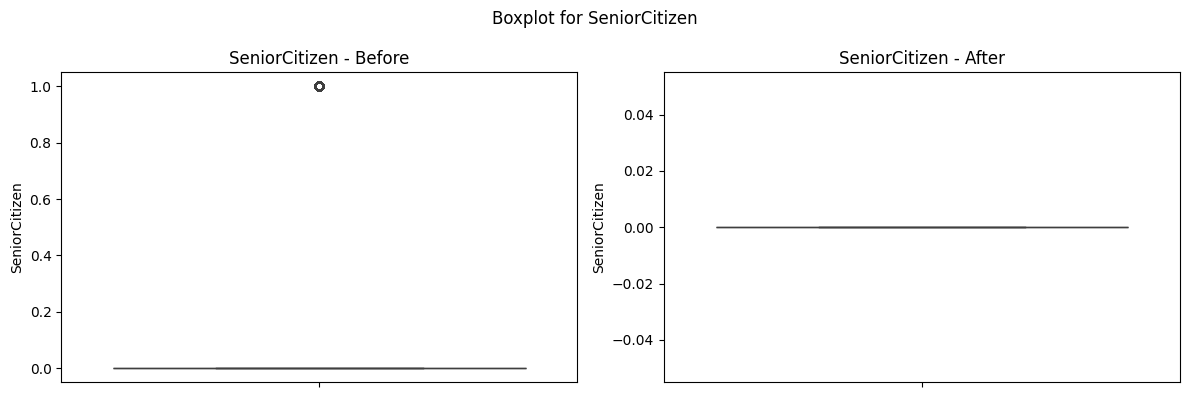


 Processing column: tenure 
Number of outliers BEFORE removal: 0
Number of outliers AFTER removal: 0


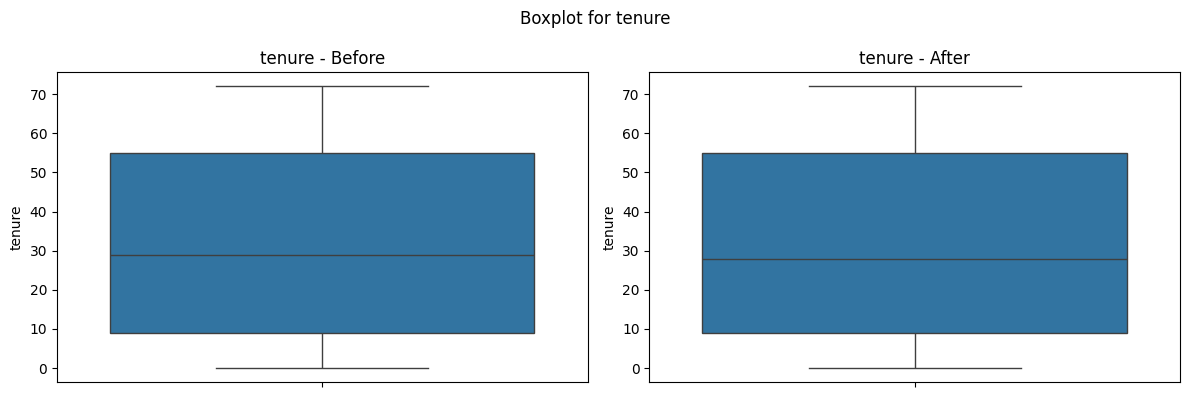


 Processing column: MonthlyCharges 
Number of outliers BEFORE removal: 0
Number of outliers AFTER removal: 0


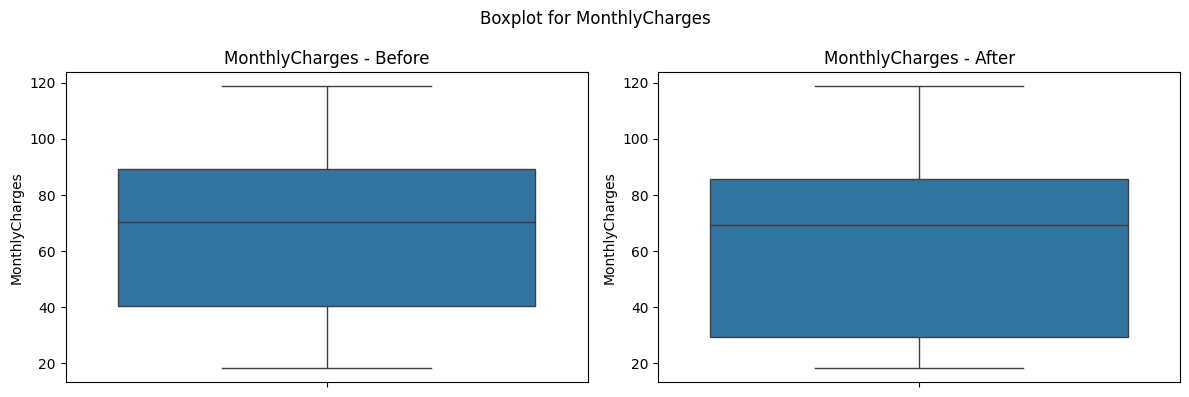


 Processing column: TotalCharges 
Number of outliers BEFORE removal: 23
Number of outliers AFTER removal: 0


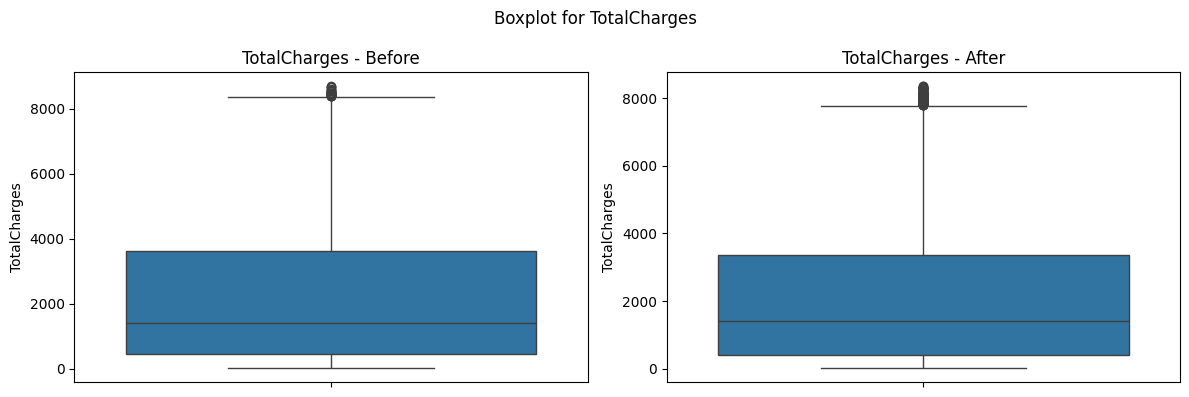

In [613]:
 
df_clean = data.copy()

for col in numeric_col:
    print(f"\n Processing column: {col} ")

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

   
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

  
    outliers_before = data[(data[col] < lower) | (data[col] > upper)]
    print(f"Number of outliers BEFORE removal: {len(outliers_before)}")
    
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    outliers_after = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    print(f"Number of outliers AFTER removal: {len(outliers_after)}")

   
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(y=data[col], ax=axes[0])
    axes[0].set_title(f"{col} - Before")

    sns.boxplot(y=df_clean[col], ax=axes[1])
    axes[1].set_title(f"{col} - After")

    plt.suptitle(f"Boxplot for {col}")
    plt.tight_layout()
    plt.show()


In [614]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data['num_months_Subscribe']=data['TotalCharges']/data['MonthlyCharges']

In [615]:
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,num_months_Subscribe
4886,2673-ZALNP,Female,0.0,No,No,7.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,173.15,No,8.701005
1661,3761-FLYZI,Female,1.0,Yes,No,65.0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),108.80,7082.45,No,65.096048
2472,3200-MNQTF,Male,0.0,Yes,No,67.0,Yes,Yes,DSL,Yes,...,Yes,No,No,Two year,No,Credit card (automatic),70.90,4677.10,No,65.967560
6910,0530-IJVDB,Male,0.0,No,Yes,70.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Electronic check,114.60,7882.50,No,68.782723
4850,0931-MHTEM,Female,0.0,No,No,54.0,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),100.05,5299.65,No,52.970015
6382,8608-OZTLB,Male,0.0,Yes,Yes,38.0,Yes,No,DSL,Yes,...,Yes,Yes,No,One year,No,Electronic check,74.05,2802.30,No,37.843349
1768,3055-VTCGS,Female,0.0,No,No,63.0,Yes,No,DSL,No,...,No,No,Yes,One year,No,Credit card (automatic),58.55,3503.50,No,59.837746
1416,4859-ZSRDZ,Female,0.0,Yes,Yes,58.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),55.50,3166.90,No,57.061261
3432,8174-TBVCF,Female,0.0,Yes,No,70.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),94.80,6859.05,No,72.352848
1062,1730-VFMWO,Female,0.0,Yes,No,34.0,Yes,No,DSL,No,...,Yes,No,No,Month-to-month,No,Bank transfer (automatic),50.20,1815.30,No,36.161355


In [616]:
data['MultipleLines']=data['MultipleLines'].replace('No phone service','No')

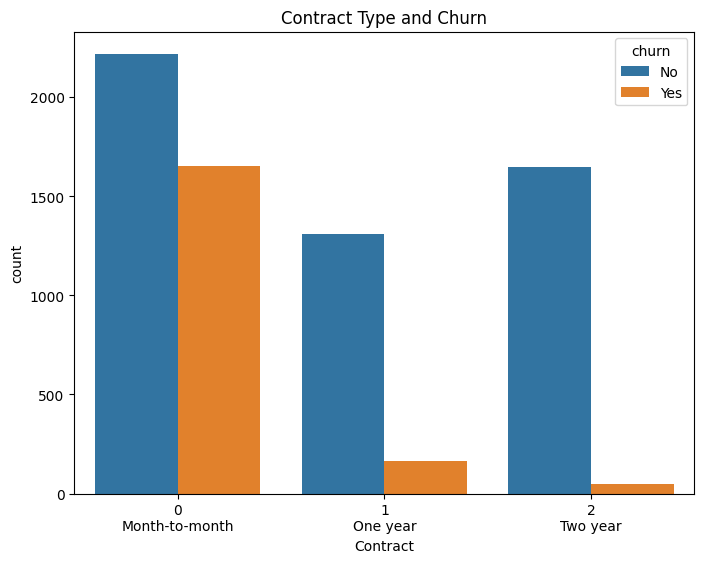

In [617]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Contract", hue="Churn", data=data)
plt.title("Contract Type and Churn")
plt.xticks(ticks=[0, 1, 2], labels=["0\nMonth-to-month", "1\nOne year", "2\nTwo year"])
plt.legend(title="churn")
plt.show()

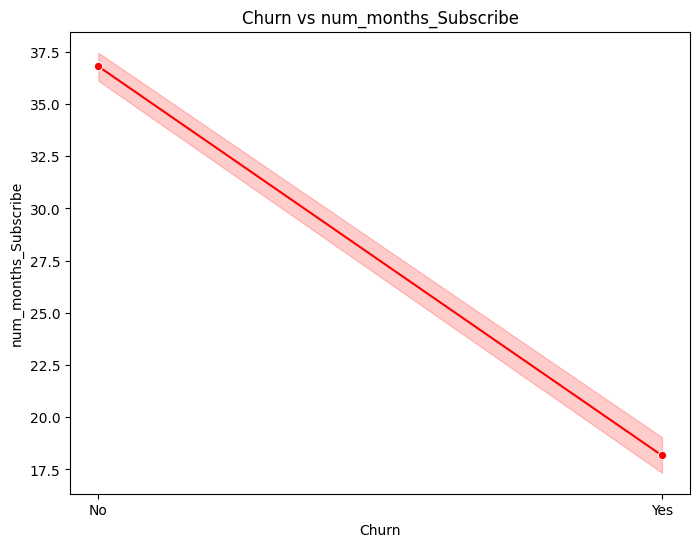

In [618]:
plt.figure(figsize=(8, 6))
sns.lineplot(x="Churn", y="num_months_Subscribe", data=data, marker="o", color="red")
plt.title("Churn vs num_months_Subscribe")
plt.show()

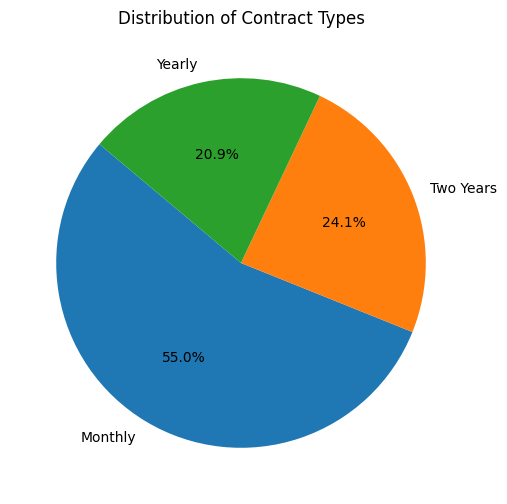

In [621]:
contract_counts = data['Contract'].value_counts()

custom_labels = ['Monthly', 'Two Years', 'Yearly']

plt.figure(figsize=(6, 6))
plt.pie(contract_counts, autopct='%1.1f%%', startangle=140,labels=custom_labels)
plt.title("Distribution of Contract Types")
plt.show()

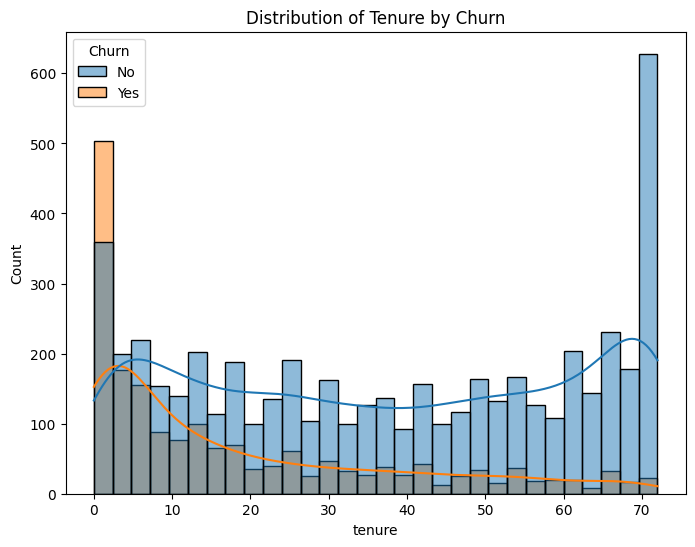

In [622]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="tenure", hue="Churn", kde=True, bins=30)
plt.title("Distribution of Tenure by Churn")
plt.show()

In [623]:
data=data.drop(columns='customerID')

In [624]:
label=LabelEncoder()
data['Contract']=label.fit_transform(data['Contract'])

In [625]:
x=data.select_dtypes(include='object').columns


encoder = OneHotEncoder(sparse_output=False, drop='first')  


encoded = encoder.fit_transform(data[x])


encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(x), index=data.index)


data.drop(columns=x, inplace=True)


data = pd.concat([data, encoded_df], axis=1)

In [626]:
data.sample(10)

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,num_months_Subscribe,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
3403,0.0,4.0,0,20.45,82.85,4.051345,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3102,0.0,5.0,0,54.20,308.25,5.687269,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3892,0.0,17.0,0,19.70,340.35,17.276650,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2467,0.0,49.0,1,97.95,4917.90,50.208270,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
6253,0.0,56.0,0,44.85,2564.95,57.189521,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
6080,0.0,1.0,0,29.70,29.70,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2038,0.0,26.0,0,90.80,2361.80,26.011013,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
541,0.0,11.0,0,58.95,601.60,10.205259,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6625,1.0,12.0,0,91.30,1094.50,11.987952,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2627,0.0,33.0,2,25.70,826.10,32.143969,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [627]:
data.columns

Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'num_months_Subscribe', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [628]:
features=data[['SeniorCitizen', 'Contract','tenure',
       'num_months_Subscribe', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]
y=data['Churn_Yes']

In [629]:
data.duplicated().sum()

np.int64(25)

In [630]:
data=data.drop_duplicates()

In [631]:
data.isnull().sum()

SeniorCitizen                            0
tenure                                   0
Contract                                 0
MonthlyCharges                           0
TotalCharges                             0
num_months_Subscribe                     0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [632]:

scaler = StandardScaler()

x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [633]:
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(x_train, y_train)
y_pred_logistic = logistic_model.predict(x_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logistic)*100," %")
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred_logistic)) 
print("Classification report:\n ",classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy:  81.33427963094393  %
Confusion matrix:
 [[931 105]
 [158 215]]
Classification report:
                precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1036
         1.0       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [634]:
cv_scores = cross_val_score(logistic_model, features, y, cv=5)  
acc_k_fold = cv_scores.mean()
print(acc_k_fold)

0.8012211473320858


In [635]:
model_xgb = xgb.XGBClassifier( eval_metric='mlogloss', n_estimators=100)
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
print(f"Accuracy of XGBoost: {accuracy_score(y_test, y_pred_xgb)}")
cv_scores = cross_val_score(model_xgb, features, y, cv=5)  
acc_k_fold = cv_scores.mean()
print(acc_k_fold)

Accuracy of XGBoost: 0.7906316536550745
0.7812029203497
